In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [24]:
import os
datamain=pd.read_csv('..\loan.csv')
datamain.head()
datamain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
datamain.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

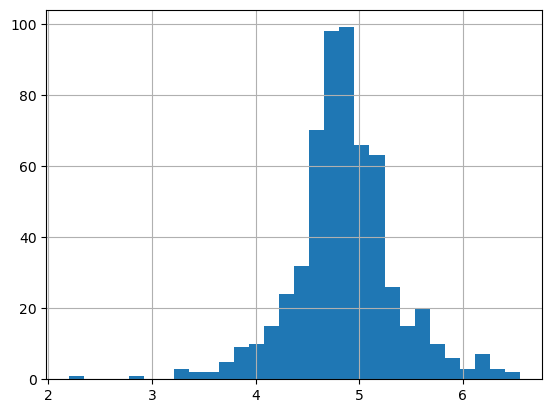

In [16]:
datamain["LoanAmount_amount"]=np.log(datamain["LoanAmount"])
datamain["LoanAmount_amount"].hist(bins=30)

<Axes: >

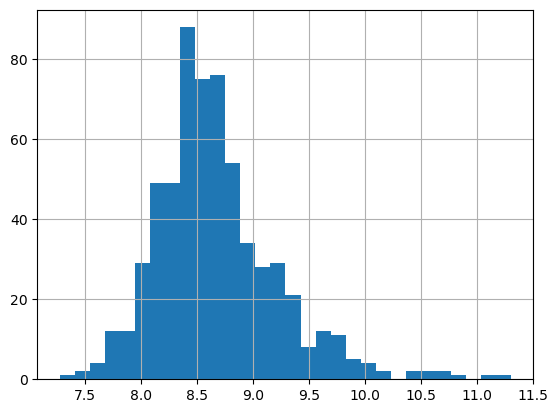

In [20]:
datamain["TotalIncome"]=datamain["ApplicantIncome"]+datamain["CoapplicantIncome"]
np.log(datamain["TotalIncome"]).hist(bins=30)

In [24]:
list_fillna_mode=["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term","Credit_History"]
list_fillna_mean=['LoanAmount','LoanAmount_amount']
for i in list_fillna_mode:
        datamain[i].fillna( datamain[i].mode()[0],inplace=True)
for j in list_fillna_mean:
        datamain[j].fillna( datamain[j].mode()[0],inplace=True)
datamain.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_amount    0
TotalIncome          0
dtype: int64

In [103]:
corr=datamain.corr()
X=datamain.iloc[:,np.r_[1:5,9:11,13:15]].values
y=datamain.iloc[:,12].values
datamain

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_amount,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,4.787492,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,7583.0


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import LabelEncoder
labelEncoder_x=LabelEncoder()
labelEncoder_y=LabelEncoder()

In [64]:
for i_x in range(5):
    X_train[:,i_x]=labelEncoder_x.fit_transform(X_train[:,i_x])
    X_train[:,7]=labelEncoder_x.fit_transform(X_train[:,7])
    X_test[:,i_x]=labelEncoder_x.fit_transform(X_test[:,i_x])
    X_test[:,7]=labelEncoder_x.fit_transform(X_test[:,7])
X_train,X_test

(array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
        [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
        [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
        ...,
        [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
        [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
        [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object),
 array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
        [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
        [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
        [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
        [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
        [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
        [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
        [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
        [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
        [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
        [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
        [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
        [0, 0, 0, 

In [55]:
y_train=labelEncoder_y.fit_transform(y_train)
y_test=labelEncoder_y.fit_transform(y_test)

In [78]:
from sklearn.preprocessing import StandardScaler
StandardScaler_X=StandardScaler()
X_train=StandardScaler_X.fit_transform(X_train)
X_test=StandardScaler_X.fit_transform(X_test)


array([[ 0.46671381, -1.25      , -0.64059361, -0.51772699,  0.29935278,
         0.3866946 , -0.94148436,  0.73262333],
       [-2.14264068, -1.25      , -0.64059361, -0.51772699,  0.29935278,
         0.3866946 , -0.30422464, -0.89540272],
       [ 0.46671381,  0.8       , -0.64059361, -0.51772699,  0.29935278,
         0.3866946 ,  2.04880945,  1.27529868],
       [ 0.46671381,  0.8       , -0.64059361, -0.51772699,  0.29935278,
         0.3866946 , -0.34413838,  0.58981403],
       [ 0.46671381,  0.8       ,  1.37974009, -0.51772699,  0.29935278,
         0.3866946 , -0.62273678, -1.06677388],
       [ 0.46671381,  0.8       , -0.64059361,  1.93151993, -2.07615636,
        -2.58602011,  0.55402875,  0.30419542],
       [ 0.46671381,  0.8       ,  2.38990694, -0.51772699, -2.07615636,
         0.3866946 ,  0.44393639,  0.50412845],
       [ 0.46671381, -1.25      , -0.64059361, -0.51772699,  0.29935278,
         0.3866946 ,  2.54310649,  1.56091729],
       [ 0.46671381, -1.25      

In [150]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNet,LogisticRegression

models=[RandomForestClassifier(),ExtraTreesClassifier(),DecisionTreeClassifier(),GaussianNB(),LogisticRegression()]


In [151]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,max_error,mean_squared_log_error,median_absolute_error
model_scores=[accuracy_score,r2_score,mean_absolute_error,max_error,mean_squared_log_error,median_absolute_error]
model_scores_name=["accuracy_score","r2_score","mean_absolute_error","max_error","mean_squared_log_error","median_absolute_error"]
for model in models:
    model.fit(X_train,y_train)
    model_predict=model.predict(X_test)
    for scores in range(0,len(model_scores)):
            print ("{}".format(model) + " --> " , model_scores_name[scores] +" : ", model_scores[scores](y_test,model_predict))

RandomForestClassifier() -->  accuracy_score :  0.7560975609756098
RandomForestClassifier() -->  r2_score :  -0.24242424242424243
RandomForestClassifier() -->  mean_absolute_error :  0.24390243902439024
RandomForestClassifier() -->  max_error :  1
RandomForestClassifier() -->  mean_squared_log_error :  0.11718366193126861
RandomForestClassifier() -->  median_absolute_error :  0.0
ExtraTreesClassifier() -->  accuracy_score :  0.7723577235772358
ExtraTreesClassifier() -->  r2_score :  -0.1595959595959595
ExtraTreesClassifier() -->  mean_absolute_error :  0.22764227642276422
ExtraTreesClassifier() -->  max_error :  1
ExtraTreesClassifier() -->  mean_squared_log_error :  0.10937141780251738
ExtraTreesClassifier() -->  median_absolute_error :  0.0
DecisionTreeClassifier() -->  accuracy_score :  0.7479674796747967
DecisionTreeClassifier() -->  r2_score :  -0.2838383838383838
DecisionTreeClassifier() -->  mean_absolute_error :  0.25203252032520324
DecisionTreeClassifier() -->  max_error :  1


'C:\\Users\\Admin\\Untitled Folder 7'